In [1]:
import os
import kaggle #conda install -c kaggle 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
%matplotlib inline

In [2]:
os.chdir("../tratados")
os.getcwd()

'/home/antero/Documentos/tcc/tratados'

In [3]:
with open('imdb.pkl', 'rb') as f:
    df_imdb=pickle.load(f)

In [4]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447057 entries, 0 to 1161023
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   titleType      447057 non-null  object 
 1   primaryTitle   447057 non-null  object 
 2   originalTitle  447057 non-null  object 
 3   startYear      447057 non-null  int64  
 4   genres         435537 non-null  object 
 5   averageRating  447057 non-null  float64
 6   numVotes       447057 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 27.3+ MB


In [5]:
titleType = df_imdb.titleType.value_counts()
titleType 

movie      264462
short      133243
tvMovie     47155
tvShort      2197
Name: titleType, dtype: int64

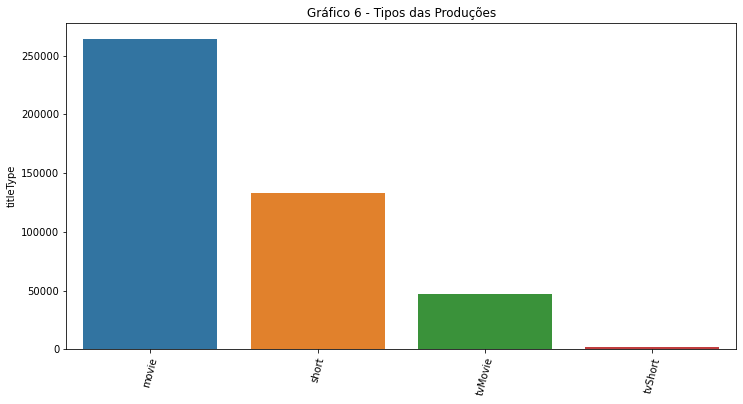

In [6]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Gráfico 6 - Tipos das Produções")
sns.barplot(x=titleType .index, y=titleType);

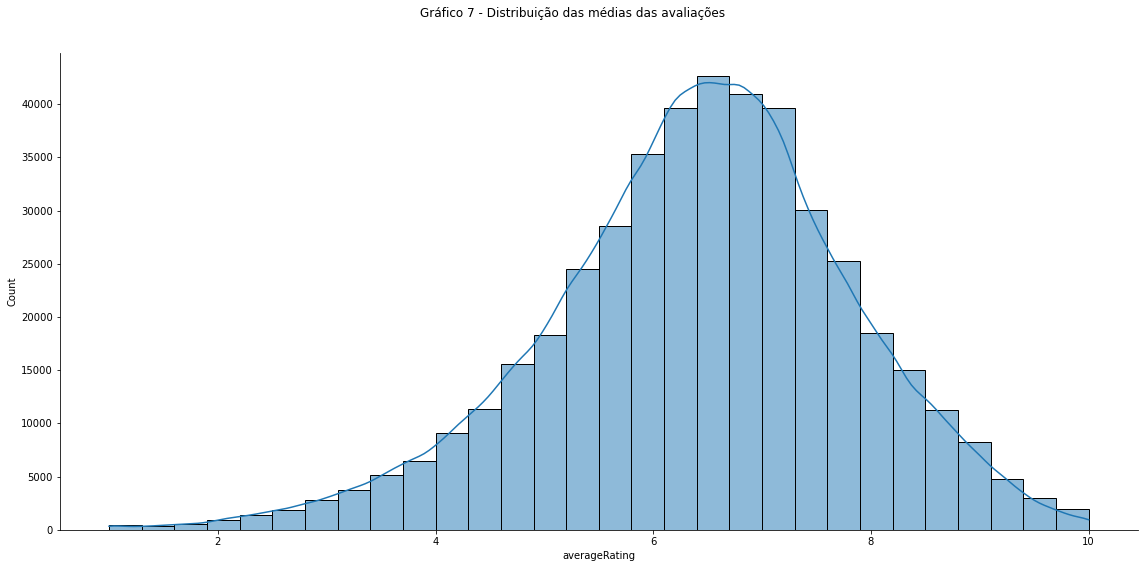

In [7]:
graph7 = sns.displot(df_imdb['averageRating'], kde=True, bins=30, height=8, aspect=2)
graph7.fig.subplots_adjust(top=.9)
graph7.fig.suptitle('Gráfico 7 - Distribuição das médias das avaliações');

In [8]:
df_imdb['numVotes'].max()

2403003

In [9]:
#graph8 = px.scatter(df_imdb, x='averageRating', y='numVotes', trendline="ols", title='Gráfico 8 - Dispersão do número de avaliações pela média de avaliações')
#graph8.show()

In [10]:
popular_genres = df_imdb.genres.value_counts().head(30)
popular_genres

Drama                      53564
Documentary                35104
Comedy                     27900
Drama,Short                21384
Short                      19813
Comedy,Short               15298
Documentary,Short          11754
Comedy,Drama                9481
Drama,Romance               8926
Animation,Short             8850
Horror                      6138
Comedy,Romance              5578
Comedy,Drama,Romance        4952
Thriller                    4805
Crime,Drama                 4361
Horror,Short                4075
Action                      3877
Animation,Comedy,Family     3400
Drama,Thriller              3204
Action,Crime,Drama          3032
Romance                     2915
Comedy,Drama,Short          2600
Adult                       2580
Action,Drama                2571
Western                     2330
Horror,Thriller             2134
Drama,War                   2126
Documentary,Music           2089
Crime                       2003
Short,Thriller              1982
Name: genr

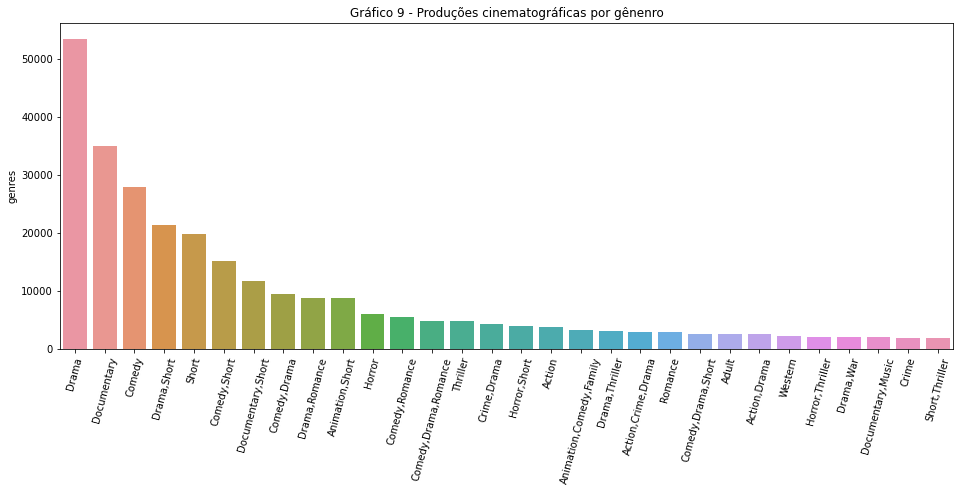

In [11]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=75)
plt.title("Gráfico 9 - Produções cinematográficas por gênenro")
sns.barplot(x=popular_genres.index, y=popular_genres);

In [12]:
genres = df_imdb.groupby('genres')
rating_genres = genres.averageRating.mean().sort_values(ascending=False).head(30) 
rating_genres

genres
Game-Show,Short                 9.900000
News,Reality-TV,Short           9.600000
Family,News                     9.500000
Musical,Sport                   9.400000
Family,Short,Western            9.000000
History,Horror,Romance          8.900000
Documentary,News,Reality-TV     8.900000
Animation,History,Mystery       8.900000
History,Romance,Short           8.900000
Comedy,Drama,Reality-TV         8.900000
Biography,Family,Fantasy        8.900000
Music,News,Short                8.900000
Biography,Horror,Short          8.900000
Biography,Family,Mystery        8.800000
Family,History,News             8.800000
Comedy,Talk-Show                8.700000
Musical,Romance,Sci-Fi          8.650000
History,Short,Thriller          8.650000
Family,Music,Western            8.600000
Biography,History,News          8.550000
Action,Horror,Musical           8.500000
Crime,Musical,Short             8.450000
Comedy,Mystery,Sport            8.400000
Family,Music,Sport              8.400000
Documenta

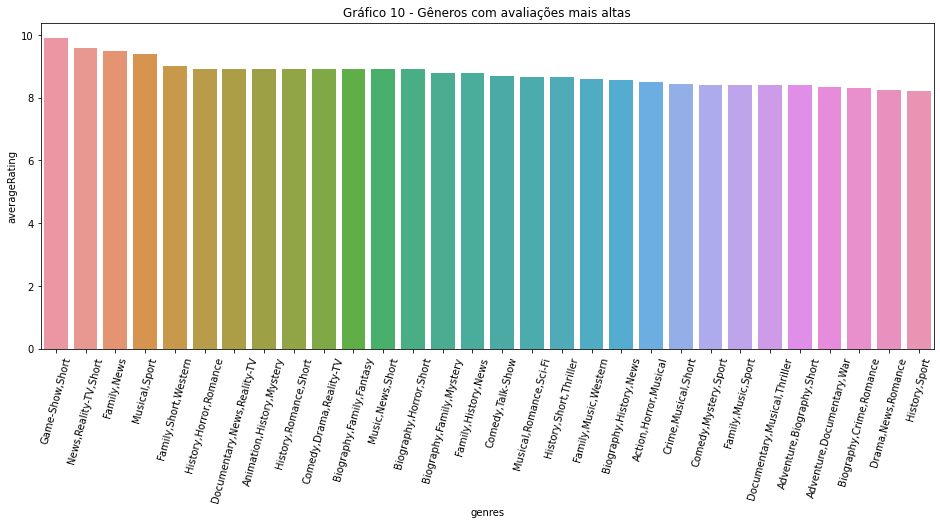

In [13]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=75)
plt.title("Gráfico 10 - Gêneros com avaliações mais altas")
sns.barplot(x=rating_genres.index, y=rating_genres);

In [14]:
rating_popular_genres = genres.averageRating.mean().filter(items=popular_genres.index).sort_values(ascending=False)
rating_popular_genres

genres
Documentary,Music          7.419196
Short,Thriller             7.256105
Documentary                7.148596
Comedy,Drama,Short         7.114962
Drama,Short                7.008399
Comedy,Short               6.770565
Short                      6.609140
Horror,Short               6.579926
Documentary,Short          6.528212
Animation,Comedy,Family    6.503147
Drama,War                  6.493086
Animation,Short            6.393898
Drama                      6.378181
Comedy,Drama,Romance       6.340408
Comedy,Drama               6.272092
Drama,Romance              6.208223
Crime,Drama                6.143316
Crime                      6.035746
Action,Crime,Drama         5.947691
Western                    5.932318
Romance                    5.916295
Comedy,Romance             5.896271
Comedy                     5.890090
Adult                      5.855349
Drama,Thriller             5.844413
Action,Drama               5.801828
Action                     5.518262
Thriller             

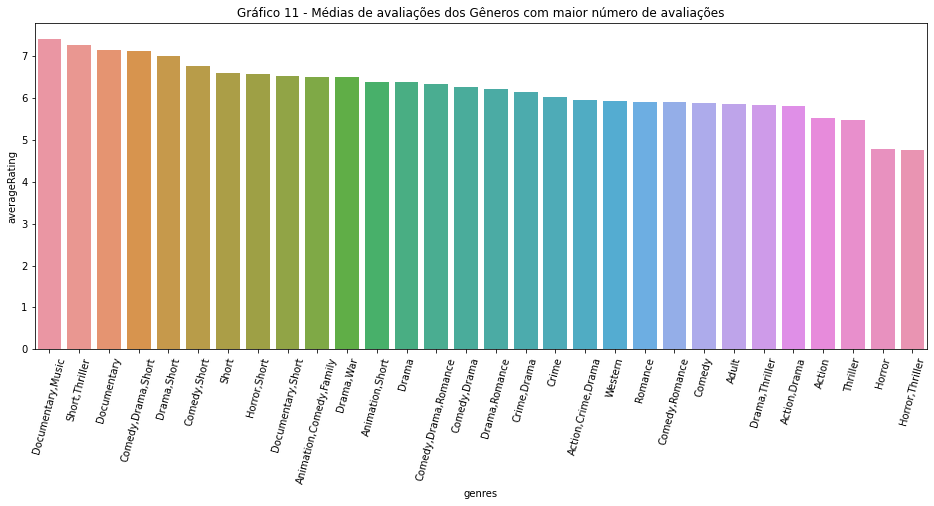

In [15]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=75)
plt.title('Gráfico 11 - Médias de avaliações dos Gêneros com maior número de avaliações')
sns.barplot(x=rating_popular_genres.index, y=rating_popular_genres);

In [16]:
df_imdb.numVotes.mean()

2024.8961676027889

In [17]:
df_imdb.averageRating.mean()

6.391454109878573